In [167]:
import pandas as pd
import numpy as np
import time
import os

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(color_codes=True)

In [168]:
df = pd.read_csv('games_with_cp_metrics.csv')
df.head()

,event,date,player,elo,color,opponent,result,avg_cp_loss,std_cp_loss
0,Wch U12,1993.??.??,"Horvath, Adam",2110,white,"Aronian, Levon",won,37.678571,71.388301
1,EU-ch U12,1994.??.??,"Szabo, Gergely",2030,white,"Aronian, Levon",lost,56.758621,132.883318
2,Wch U12,1994.??.??,"Bacrot, Etienne",2255,white,"Aronian, Levon",lost,53.325000,81.589334
3,Bucharest,1995.??.??,"Khachian, Melikset",2400,white,"Aronian, Levon",draw,14.700000,18.286881
4,Bucharest,1995.??.??,"Aronian, Levon",2330,black,"Khachian, Melikset",draw,12.700000,11.756275


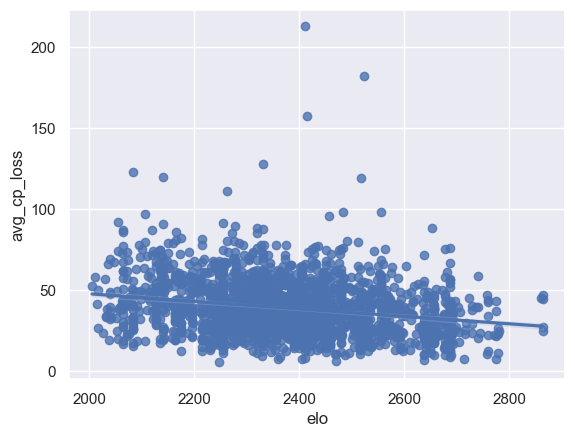

In [169]:
ax = sns.regplot(x='elo', y='avg_cp_loss', data=df)

In [170]:
def create_tiers(start: int, end: int, size: int = 25) -> dict:
    tier_ranges = {}
    while start < end:
        tier_ranges[range(start, start+size)] = start
        start += size
    return tier_ranges

def get_tier(value: int, tiers: dict) -> int:
    for k, v in tiers.items():
        if value in k:
            return v
    return None

def get_cp_loss_by_tier(df: pd.DataFrame) -> pd.DataFrame:
    start_elo, end_elo = df['elo'].min(), df['elo'].max()
    tier_ranges = create_tiers(start=start_elo, end=end_elo, size=25)
    df['tier'] = df['elo'].apply(lambda x: get_tier(x, tier_ranges))
    return df.groupby(['tier'])['avg_cp_loss'].mean().reset_index()

In [171]:
all_avg_cp_loss_by_tier = get_cp_loss_by_tier(df)

In [172]:
avg_cp_loss_by_tier = df.groupby(['tier'])['avg_cp_loss'].mean().reset_index()
std_cp_loss_by_tier = df.groupby(['tier'])['std_cp_loss'].mean().reset_index()

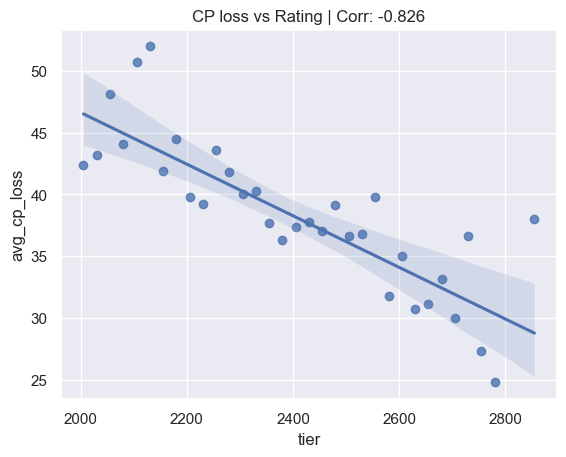

In [173]:
sns.regplot(x='tier', y='avg_cp_loss', data=all_avg_cp_loss_by_tier)
corr = all_avg_cp_loss_by_tier.corr().iloc[0, 1]
plt.title(f'CP loss vs Rating | Corr: {corr:.3f}');

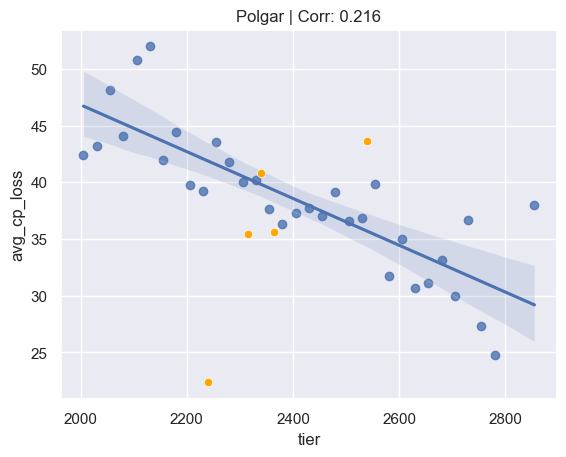

In [174]:
player = 'Polgar'
player_df = df[df['player'].str.contains(player)].copy()
player_avg_cp_loss_by_tier = get_cp_loss_by_tier(player_df)
sns.regplot(x='tier', y='avg_cp_loss', data=all_avg_cp_loss_by_tier)
# sns.regplot(x='tier', y='avg_cp_loss', data=player_avg_cp_loss_by_tier)
sns.scatterplot(x='tier', y='avg_cp_loss', data=player_avg_cp_loss_by_tier, c='orange', legend=False)
corr = player_df[['tier', 'avg_cp_loss']].corr().iloc[0, 1]
plt.title(f'{player} | Corr: {corr:.3f}');